In [1]:
Output = ('/Users/alexis/Library/Clouexposuretorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1005. Miscellaneous Analyses/P1005.6. Yael RNAseq Grant/P1005.6.3. Analyses/P1005.6.3.2. Volcano Plots/Output')
cur_date = "012224"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)

#reading in file
exposure_df = data.frame(read_excel("Input/Exposure_DESeq2_012224.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(exposure_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Treatment,Control,Covariates
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,KLF4,923.11601,0.9743332,0.1835047,5.309581,1.098776e-07,7.966129e-05,Nicotine Salts,Control,None
2,CSF3_1,70.09449,2.8418923,0.7809307,3.639110,2.735823e-04,9.917358e-02,Nicotine Salts,Control,None
3,NCOA7,2005.62251,0.7240906,0.2077258,3.485799,4.906687e-04,1.185783e-01,Nicotine Salts,Control,None
4,NFIL3,67.07713,0.7371617,0.2215483,3.327319,8.768606e-04,1.271448e-01,Nicotine Salts,Control,None
5,ZC3H12C,305.31619,0.6865087,0.2050402,3.348167,8.134801e-04,1.271448e-01,Nicotine Salts,Control,None
6,EIF2AK3,571.72427,0.4722865,0.1546549,3.053808,2.259563e-03,2.730305e-01,Nicotine Salts,Control,None


Creating a volcano plot to visualize genes that were differentially expressed across tobacco use groups (exposure). 

In [3]:
# adding a col to denote whether a gene had a significant p value, log FC, or both

# add a column of NAs
exposure_df$diffexpressed <- "No Significance"

# if p value is significant only
exposure_df$diffexpressed[exposure_df$pvalue < 0.05] <- "P Value Only"

# if log2FoldChange > log2(1.5) and pvalue < 0.05, set as "significant" 
exposure_df$diffexpressed[abs(exposure_df$log2FoldChange) > abs(log2(1.5)) & exposure_df$pvalue < 0.05] <- "P Value and log2 Fold Change"

# making into a factor
exposure_df$diffexpressed = factor(exposure_df$diffexpressed, levels = c("No Significance", "P Value Only", 
                                                                       "P Value and log2 Fold Change"))

# viewing df
head(exposure_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Treatment,Control,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,KLF4,923.11601,0.9743332,0.1835047,5.309581,1.098776e-07,7.966129e-05,Nicotine Salts,Control,None,P Value and log2 Fold Change
2,CSF3_1,70.09449,2.8418923,0.7809307,3.639110,2.735823e-04,9.917358e-02,Nicotine Salts,Control,None,P Value and log2 Fold Change
3,NCOA7,2005.62251,0.7240906,0.2077258,3.485799,4.906687e-04,1.185783e-01,Nicotine Salts,Control,None,P Value and log2 Fold Change
4,NFIL3,67.07713,0.7371617,0.2215483,3.327319,8.768606e-04,1.271448e-01,Nicotine Salts,Control,None,P Value and log2 Fold Change
5,ZC3H12C,305.31619,0.6865087,0.2050402,3.348167,8.134801e-04,1.271448e-01,Nicotine Salts,Control,None,P Value and log2 Fold Change
6,EIF2AK3,571.72427,0.4722865,0.1546549,3.053808,2.259563e-03,2.730305e-01,Nicotine Salts,Control,None,P Value Only


In [4]:
filtered_df = exposure_df %>%
    # filtering for the crude model
    filter(Covariates == 'None') %>%
    # removing information that denotes that a gene is a duplicate
    separate(Gene, c("Gene", NA)) %>%
    # merging cols to create 1 for the exposure comparision
    unite(col = 'Comparison', c('Treatment', 'Control'), sep = ' vs. ') %>%
    # removing 1 comparison
    filter(Comparison != "Freebase Nicotine vs. Nicotine Salts")

head(filtered_df)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1770 rows [1, 3, 4, 5, 6,
7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, ...].”


,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Comparison,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,KLF4,923.11601,0.9743332,0.1835047,5.309581,1.098776e-07,7.966129e-05,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
2,CSF3,70.09449,2.8418923,0.7809307,3.639110,2.735823e-04,9.917358e-02,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
3,NCOA7,2005.62251,0.7240906,0.2077258,3.485799,4.906687e-04,1.185783e-01,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
4,NFIL3,67.07713,0.7371617,0.2215483,3.327319,8.768606e-04,1.271448e-01,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
5,ZC3H12C,305.31619,0.6865087,0.2050402,3.348167,8.134801e-04,1.271448e-01,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
6,EIF2AK3,571.72427,0.4722865,0.1546549,3.053808,2.259563e-03,2.730305e-01,Nicotine Salts vs. Control,None,P Value Only


In [5]:
# identifying genes commonly modulated across exposure groups to label them differently
common_genes =  c('KLF4', 'NCOA7', 'CSF3', 'ZC3H12C')#paste0(
#     "italic('",
#    c('KLF4', 'NCOA7', 'CSF3', 'S100A10', 'ZC3H12C'),
#    "')")

`%notin%` <- Negate(`%in%`)

common_genes_df = filtered_df %>%
    filter(Gene %in% common_genes & diffexpressed == "P Value and log2 Fold Change") 
noncommon_genes_df = filtered_df %>%
    filter(Gene %notin% common_genes & diffexpressed == "P Value and log2 Fold Change")

head(common_genes_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Comparison,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,KLF4,923.11601,0.9743332,0.1835047,5.309581,1.098776e-07,7.966129e-05,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
2,CSF3,70.09449,2.8418923,0.7809307,3.639110,2.735823e-04,9.917358e-02,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
3,NCOA7,2005.62251,0.7240906,0.2077258,3.485799,4.906687e-04,1.185783e-01,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
4,ZC3H12C,305.31619,0.6865087,0.2050402,3.348167,8.134801e-04,1.271448e-01,Nicotine Salts vs. Control,None,P Value and log2 Fold Change
5,KLF4,923.11601,0.8834342,0.1835328,4.813495,1.483130e-06,1.075269e-03,Freebase Nicotine vs. Control,None,P Value and log2 Fold Change
6,ZC3H12C,305.31619,0.6621671,0.2050529,3.229250,1.241153e-03,3.799619e-01,Freebase Nicotine vs. Control,None,P Value and log2 Fold Change


# Volcano Plot

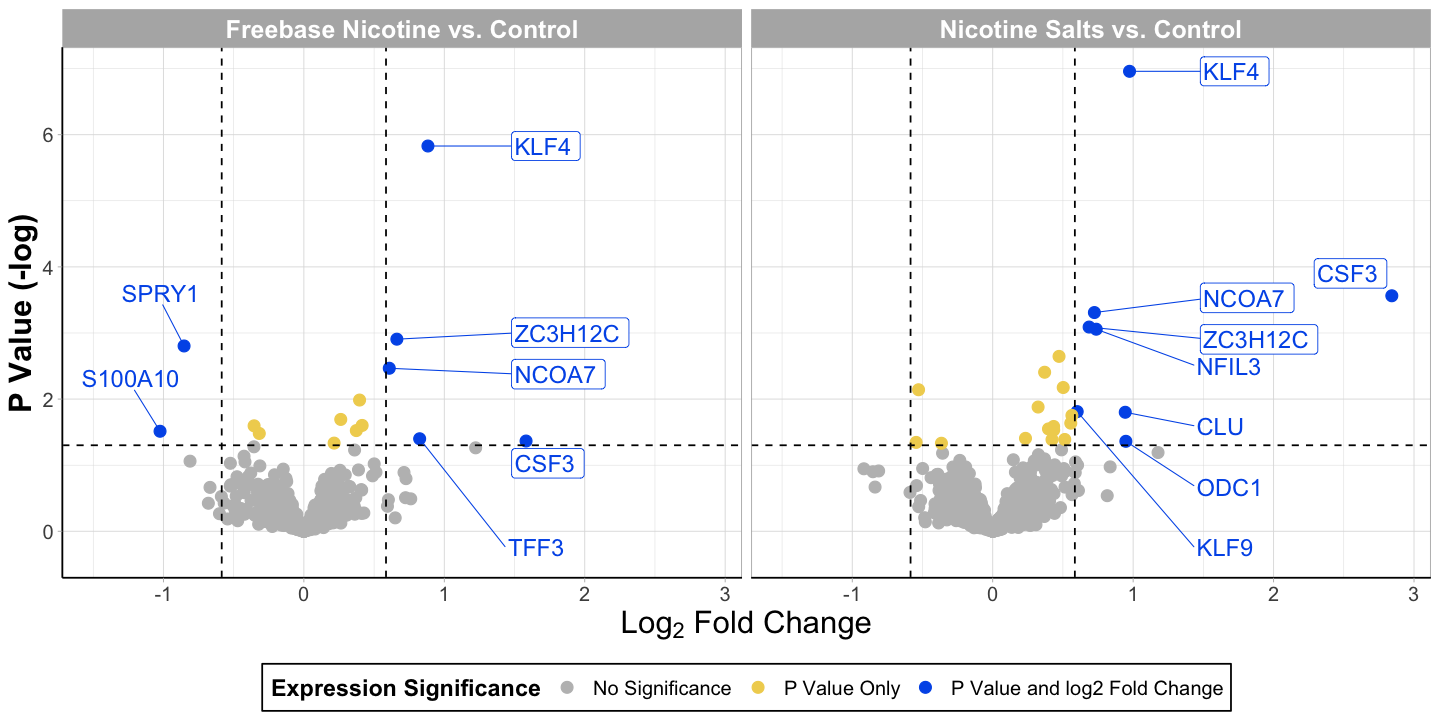

In [10]:
options(repr.plot.width=12, repr.plot.height=6) #changing size

ggplot() + 
  geom_point(data = filtered_df, aes(x = log2FoldChange, y = -log10(pvalue), color = diffexpressed), size = 3) + 

  # P Value line
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
  # FC Line
  geom_vline(xintercept = log2(1.5), linetype = "dashed") +
  geom_vline(xintercept = -log2(1.5), linetype = "dashed") +

  # changing x limits of what is visible in the plot
  xlim(-1.5, 2.9) + 

 #labeling points with statistical significance and FC
  geom_label_repel(data = common_genes_df %>%
                  filter(log2FoldChange > log2(1.5)), aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed),
                  xlim = c(1.5, NA), hjust = 0, segment.size = 0.3, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE) + 

  geom_text_repel(data = noncommon_genes_df %>%
                  filter(log2FoldChange > log2(1.5)), 
                  aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), xlim = c(1.3, NA), hjust = 0, 
                  segment.size = 0.3, box.padding = 0.9, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE, nudge_y = -1.7) + 

  geom_text_repel(data = noncommon_genes_df %>%
                  filter(log2FoldChange < -log2(1.5)), 
                 aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), xlim = c(-2, NA), hjust = 0.8, 
                 segment.size = 0.3, box.padding = 0.9, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE, nudge_y = 0.8) + 

  facet_wrap(~Comparison, scales = 'free_x') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Value (-log)') +

  scale_color_manual(name = "Expression Significance",
                      values = c("gray", '#F0D25E', "#005BEA"))